In [12]:
import os
import numpy as np
import cv2 as cv

from PIL import Image

from lic import *

In [13]:
import vectorplot as vp

In [14]:
test_img = '../images/squirrel.jpeg'

In [15]:
img = cv.imread(test_img)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# resize to 2x is small
if min(img.shape[:2]) < 255:
    img = cv.resize(img, tuple(np.array(img.shape[:-1][::-1]) * 2))
img_lab = cv.cvtColor(img, cv.COLOR_RGB2LAB)
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
img_gray_rgb = cv.cvtColor(img_gray, cv.COLOR_GRAY2RGB)

In [16]:
from mcgp import *

In [17]:
gaussp = []
N = 3
get_gp(img_gray_rgb, gaussp, N)

In [18]:
from draw_map import *

In [19]:
saliency_map, binarized_map, salient_region, out = get_dmap(img_gray_rgb, saliency_met=0)

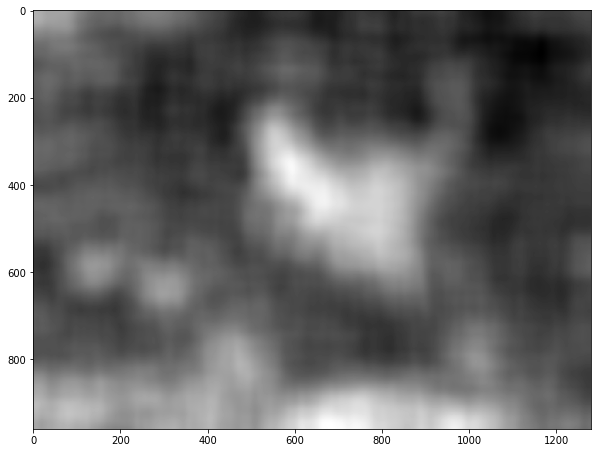

In [20]:
plt.figure(figsize=(10, 10))
plt.imshow(out, cmap='gray')

In [21]:
labels, label_counts = label_regions(img_lab, img_lab.shape[0] * img_lab.shape[1] // 8)
vec = extract_region_vector_field(img_gray, labels, label_counts)

In [22]:
im_noise1 = generate_noise_image(img_gray, labels, label_counts, lambda_1=1, lambda_2=.5)

In [24]:
from multi_res import get_mr_img_from_rgb_img